In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import pyreadr
import sys

sys.path.append('../utils_folder/')
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from matplotlib import rc as mtprc
mtprc('xtick', labelsize=20) 
mtprc('ytick', labelsize=20)

from utils_GD import *
from utils_IBP import *
from utils_plots import *

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
orange_dict = make_color_dict('orange')
black_dict = make_color_dict('k')

In [3]:
res = np.load('results/_small_N_cancer_types.npy', allow_pickle=1).item()
color_dictionary = np.load('Plots/color_dictionary.npy', allow_pickle=1).item()
colors =[ color_dictionary['SSB'], color_dictionary['IBP'], color_dictionary['LP'], color_dictionary['J'][0], color_dictionary['J'][1], color_dictionary['J'][2], color_dictionary['J'][3], color_dictionary['GT'][0], color_dictionary['GT'][1]]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


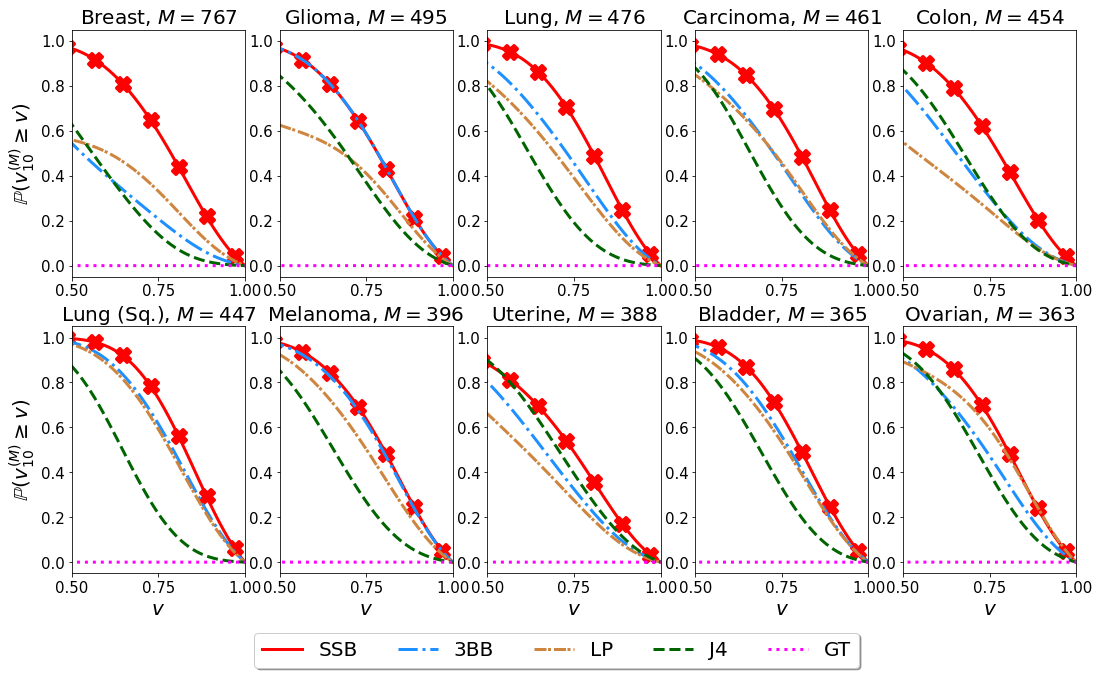

In [4]:
lw = 3
bandwith=.1
kernel = 'gaussian'
lo_retain = 100
hi_retain = -100
X_plot = np.linspace(0,1,100).reshape(-1,1)
lns = (0, (4, .5, 1, 1))


# FIGURE 1

lw = 3
bandwith=.1
kernel = 'gaussian'
lo_retain = 100
hi_retain = -100
X_plot = np.linspace(0,1,100).reshape(-1,1)
lns = (0, (4, .5, 1, 1))

cancer_type_names = {}
cancer_type_names['BRCA'] = 'Breast'
cancer_type_names['LGG'] = 'Glioma'
cancer_type_names['LUAD'] = 'Lung'
cancer_type_names['HNSC'] = 'Carcinoma'
cancer_type_names['COADREAD'] = 'Colon'
cancer_type_names['LUSC'] = 'Lung (Sq.)'
cancer_type_names['SKCM'] = 'Melanoma'
cancer_type_names['UCEC'] = 'Uterine'
cancer_type_names['BLCA'] = 'Bladder'
cancer_type_names['OV'] = 'Ovarian'

for N in [10]:
    plt.figure(figsize = (18,10))
    for c, cancer_type in enumerate(res[N].keys()):
        plt.subplot(2,5,c+1)
        M = res[N][cancer_type]['M']
        ctz = res[N][cancer_type]['cts'][0,-1]
        
        kn = res[N][cancer_type]['K']
        unm = res[N][cancer_type]['cts'][:,-1] - kn

        GD_precision = 1-np.sort(np.abs(res[N][cancer_type]['GD_preds'][:,-1] - unm)/unm)[lo_retain:hi_retain]

        kde = KernelDensity(kernel=kernel, bandwidth=bandwith).fit(GD_precision.reshape(-1,1))
        log_dens = kde.score_samples(X_plot)
        dens = np.exp(log_dens)
        dens = dens/dens.sum()
        plt.plot(X_plot[:, 0], 1-dens.cumsum(), color=color_dictionary['SSB'], lw=lw,
                linestyle='-',  label = 'SSB')
        plt.scatter(X_plot[:, 0][::8], 1-dens.cumsum()[::8], color=color_dictionary['SSB'], lw=lw,
        marker='X', s= 200)


        IBP_precision = 1-np.sort(np.abs(res[N][cancer_type]['IBP_preds'][:,-1] - unm)/unm)[lo_retain:hi_retain]

        kde = KernelDensity(kernel=kernel, bandwidth=bandwith).fit(IBP_precision.reshape(-1,1))
        log_dens = kde.score_samples(X_plot)
        dens = np.exp(log_dens)
        dens = dens/dens.sum()
        plt.plot(X_plot[:, 0], 1-dens.cumsum(), color=color_dictionary['IBP'], lw=lw,
                linestyle='-.', label = '3BB')

        LP_precision = 1-np.sort(np.abs(res[N][cancer_type]['LP_preds'][:,-1] - unm)/unm)[lo_retain:hi_retain]

        kde = KernelDensity(kernel=kernel, bandwidth=bandwith).fit(LP_precision.reshape(-1,1))
        log_dens = kde.score_samples(X_plot)
        dens = np.exp(log_dens)
        dens = dens/dens.sum()
        plt.plot(X_plot[:, 0], 1-dens.cumsum(), color=color_dictionary['LP'], lw=lw,
                linestyle=lns, label = 'LP')

        J_precision = 1-np.sort(np.abs(res[N][cancer_type]['J_preds'][:,-1,-1] - unm)/unm)[lo_retain:hi_retain]

        kde = KernelDensity(kernel=kernel, bandwidth=bandwith).fit(J_precision.reshape(-1,1))
        log_dens = kde.score_samples(X_plot)
        dens = np.exp(log_dens)
        dens = dens/dens.sum()
        plt.plot(X_plot[:, 0], 1-dens.cumsum(), color=color_dictionary['J'][-1], lw=lw,
                linestyle='--', label = 'J4')

        GT_precision = 1-np.sort(np.abs(res[N][cancer_type]['GT_preds'][:,0,0,-1] - unm)/unm)[lo_retain:hi_retain]

        kde = KernelDensity(kernel=kernel, bandwidth=bandwith).fit(GT_precision.reshape(-1,1))
        log_dens = kde.score_samples(X_plot)
        dens = np.exp(log_dens)
        dens = dens/dens.sum()
        plt.plot(X_plot[:, 0], 1-dens.cumsum(), color=color_dictionary['GT'][0], lw=lw,
                linestyle=':', label= 'GT')

        plt.xlim([.5,1])
        if c in [0,5]:
            plt.ylabel(r'$\mathbb{P}(v_{'+str(N)+'}^{(M)} \geq v)$', fontsize = 20)
        if c>=5:
            plt.xlabel(r'$v$', fontsize = 20)
        plt.title(cancer_type_names[cancer_type]+r', $M=$'+str(M), fontsize = 20)
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)
    plt.legend(loc='upper center', bbox_to_anchor=(-2, -0.2),fancybox=True, shadow=True, ncol=5, fontsize = 20)
    plt.tight_layout()
    plt.savefig('Plots/small_N_'+str(N)+'_all.pdf', bbox_inches = 'tight', dpi=1000)
    plt.savefig('Plots/small_N_'+str(N)+'_all.png', bbox_inches = 'tight', dpi=1000)
    plt.savefig('Plots/small_N_'+str(N)+'_all.eps', bbox_inches = 'tight', dpi=1000)
    plt.show()

GBM
COADREAD
UCEC
LIHC
STAD


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


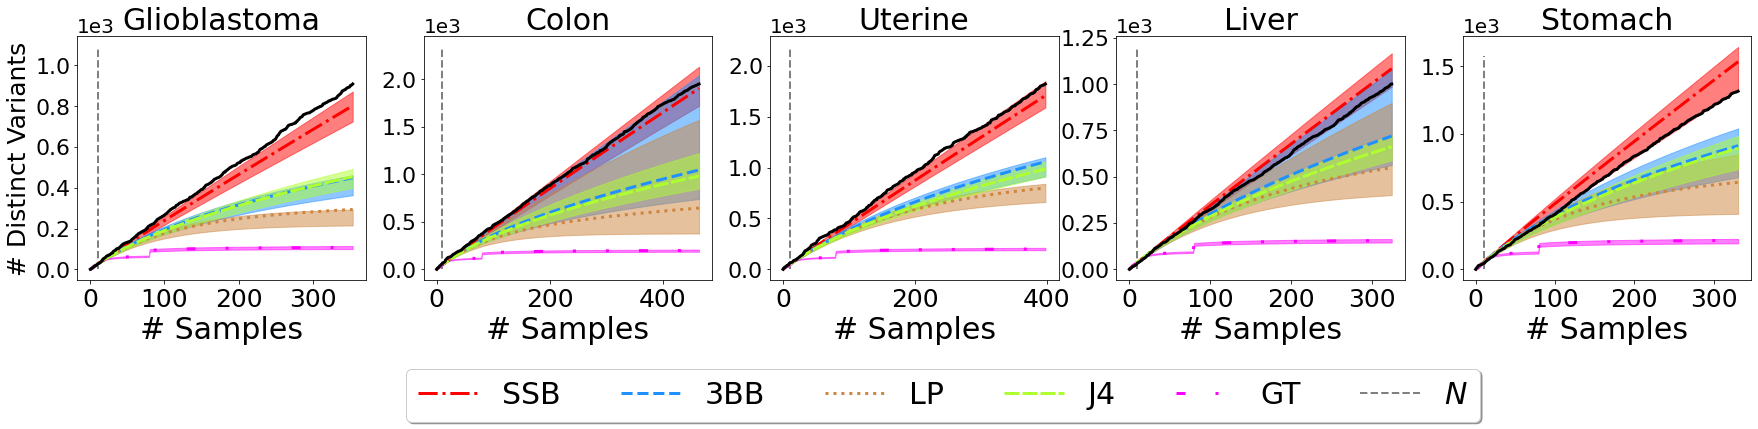

In [6]:
results = np.load('results/_folds_small_N_LOO_paper_cancer_types.npy',allow_pickle=1).item()
methods = ['SSB', '3BB', 'LP', 'J4', 'GT']
colors =[ color_dictionary['SSB'], color_dictionary['IBP'], color_dictionary['LP'], color_dictionary['J'][0], color_dictionary['GT'][0]]
linestyles = ['-.', '--', ':',  (0, (5, 1)), (0, (3, 10, 1, 10, 1, 10))]

alp = .5
lw = 3
cancer_name = ['Glioblastoma', 'Colon', 'Uterine', 'Liver', 'Stomach']
plt.figure(figsize = (30,4.5))
for c, cancer in enumerate(['GBM', 'COADREAD', 'UCEC', 'LIHC', 'STAD']):
    print(cancer)
    plt.subplot(1,5,c+1)
        
    plt.plot(results[10][cancer]['GD_mean'], color = colors[0], lw=lw, linestyle=linestyles[0], label = 'SSB')
    plt.fill_between(x = range(len(results[10][cancer]['GD_mean'])), y1= results[10][cancer]['GD_lo'], y2= results[10][cancer]['GD_hi'], color = colors[0], alpha = alp)

    plt.plot(results[10][cancer]['IBP_mean'], lw=lw, color = colors[1], linestyle=linestyles[1], label = r'3BB')
    plt.fill_between(x = range(len(results[10][cancer]['IBP_mean'])), y1= results[10][cancer]['IBP_lo'], y2= results[10][cancer]['IBP_hi'], color = colors[1], alpha = alp)

    plt.plot(results[10][cancer]['LP_mean'], color = colors[2], lw=lw, linestyle=linestyles[2], label = 'LP')
    plt.fill_between(x = range(len(results[10][cancer]['LP_mean'])), y1= results[10][cancer]['LP_lo'], y2= results[10][cancer]['LP_hi'], color = colors[2], alpha = alp)
    
    plt.plot(results[10][cancer]['J_mean'], color = colors[3], lw=lw, linestyle=linestyles[3], label = 'J4')
    plt.fill_between(x = range(len(results[10][cancer]['J_mean'])), y1= results[10][cancer]['J_lo'], y2= results[10][cancer]['J_hi'], color = colors[3], alpha = alp)

    plt.plot(results[10][cancer]['GT_mean'], color = colors[-1], lw=lw, linestyle=linestyles[-1], label = 'GT')
    plt.fill_between(x = range(len(results[10][cancer]['GT_mean'])), y1= results[10][cancer]['GT_lo'], y2= results[10][cancer]['GT_hi'], color = colors[4], alpha = alp)
    
    plt.title(cancer_name[c], fontsize = 30)
    
    plt.vlines(x = 10, ymin = 0, ymax = 1.2*results[10][cancer]['cts'][-1], color = 'gray', lw=2, linestyle = '--', label=r'$N$')
    
    if c == 0:
        plt.legend(loc='upper center', bbox_to_anchor=(3, -0.3),fancybox=True, shadow=True, ncol=6, fontsize = 30)
        plt.ylabel('# Distinct Variants', fontsize = 25)
    plt.xlabel('# Samples', fontsize = 30)
    plt.yticks(fontsize = 22)
    plt.xticks(fontsize = 25)
    
    plt.plot(results[10][cancer]['cts'], color = 'k', lw = 3)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.tight_layout()
plt.savefig('Plots/LOO_prediction.pdf', bbox_inches = 'tight', dpi=1000)
plt.savefig('Plots/LOO_prediction.eps', bbox_inches = 'tight', dpi=1000)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


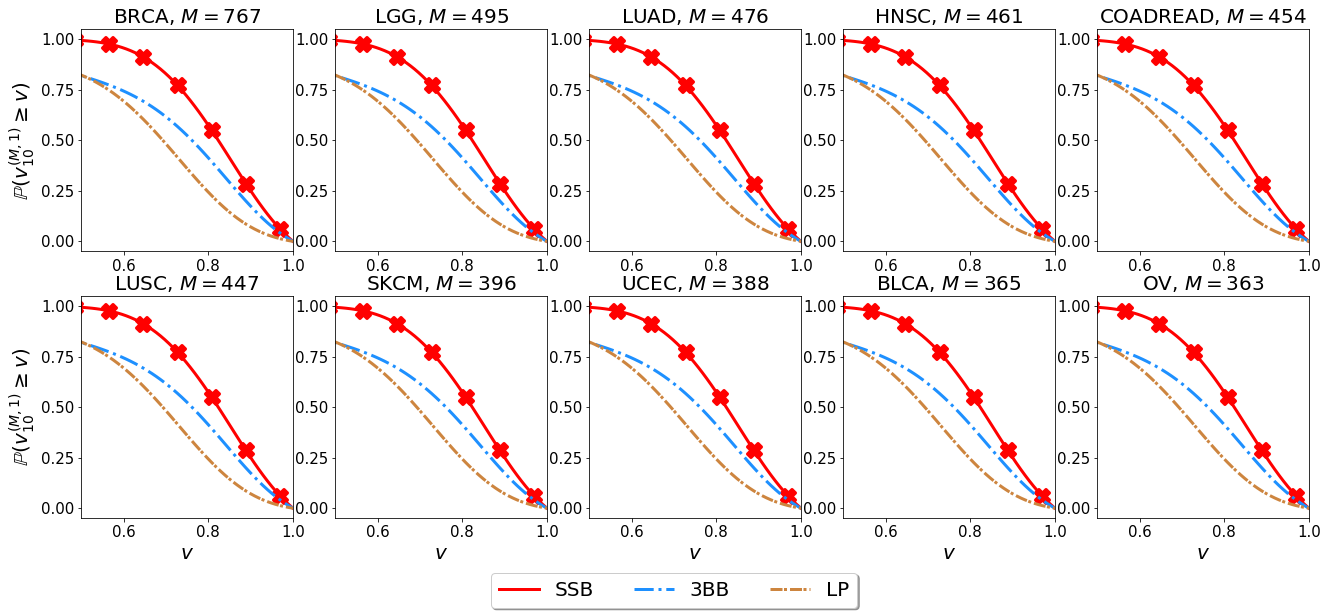

In [7]:
res_all = np.load('results/_small_N_cancer_types.npy', allow_pickle=1).item()
res = np.load('results/_small_N_paper_cancer_types_rare_variants.npy', allow_pickle=1).item()
lw = 3
bandwith=.1
kernel = 'gaussian'
lo_retain = 100
hi_retain = -100
X_plot = np.linspace(0,1,100).reshape(-1,1)
lns = (0, (4, .5, 1, 1))
for N in [10]:
    plt.figure(figsize = (22,9))
    for c, cancer_type in enumerate(res[N].keys()):
        plt.subplot(2,5,c+1)
        M = res_all[N][cancer_type]['M']
        
        GD_precision = res[N][cancer_type]['GD_precision']

        kde = KernelDensity(kernel=kernel, bandwidth=bandwith).fit(GD_precision.reshape(-1,1))
        log_dens = kde.score_samples(X_plot)
        dens = np.exp(log_dens)
        dens = dens/dens.sum()
        plt.plot(X_plot[:, 0], 1-dens.cumsum(), color=color_dictionary['SSB'], lw=lw,
                linestyle='-',  label = 'SSB')
        plt.scatter(X_plot[:, 0][::8], 1-dens.cumsum()[::8], color=color_dictionary['SSB'], lw=lw,
        marker='X', s= 200)

        IBP_precision = res[N][cancer_type]['IBP_precision']

        kde = KernelDensity(kernel=kernel, bandwidth=bandwith).fit(IBP_precision.reshape(-1,1))
        log_dens = kde.score_samples(X_plot)
        dens = np.exp(log_dens)
        dens = dens/dens.sum()
        plt.plot(X_plot[:, 0], 1-dens.cumsum(), color=color_dictionary['IBP'], lw=lw,
                linestyle='-.', label = '3BB')
        
        LP_precision = res[N][cancer_type]['LP_precision']


        kde = KernelDensity(kernel=kernel, bandwidth=bandwith).fit(LP_precision.reshape(-1,1))
        log_dens = kde.score_samples(X_plot)
        dens = np.exp(log_dens)
        dens = dens/dens.sum()
        plt.plot(X_plot[:, 0], 1-dens.cumsum(), color=color_dictionary['LP'], lw=lw,
                linestyle=lns, label = 'LP')

        plt.xlim([.5,1])
        if c in [0,5]:
            plt.ylabel(r'$\mathbb{P}(v_{'+str(N)+'}^{(M,1)} \geq v)$', fontsize = 20)
        if c>=5:
            plt.xlabel(r'$v$', fontsize = 20)
        plt.title(cancer_type+r', $M=$'+str(M), fontsize = 20)
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)
    plt.legend(loc='upper center', bbox_to_anchor=(-2, -0.2),fancybox=True, shadow=True, ncol=5, fontsize = 20)
    plt.tight_layout()
    plt.savefig('Plots/small_N_'+str(N)+'_rare.pdf', bbox_inches = 'tight', dpi=1000)
    plt.savefig('Plots/small_N_'+str(N)+'_rare.eps', bbox_inches = 'tight', dpi=1000)
    plt.show()

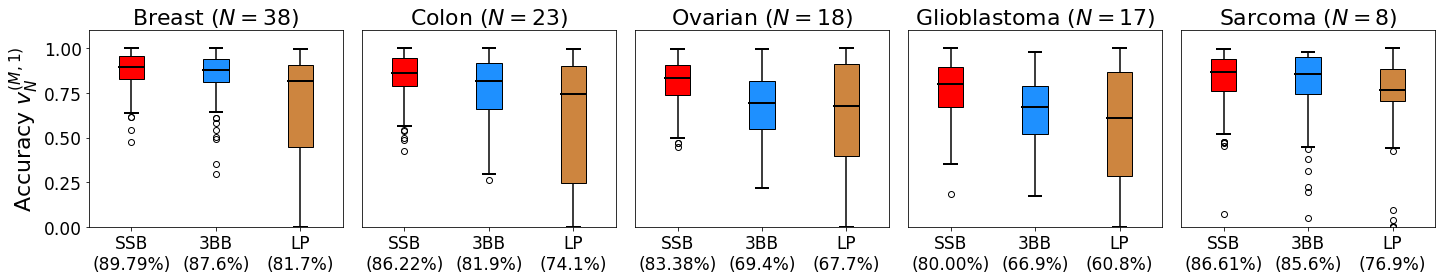

In [8]:
results_rare_variants = np.load('results/_paper_cancer_types_rare_variants.npy', allow_pickle=1).item()


# BREAST, OVARIAN, COLORECTAL
colors =[ color_dictionary['SSB'], color_dictionary['IBP'], color_dictionary['LP']] #, color_dictionary['J'][0], color_dictionary['J'][1], color_dictionary['J'][2], color_dictionary['J'][3], color_dictionary['GT'][0], color_dictionary['GT'][1]]
mtprc('xtick', labelsize=17) 
mtprc('ytick', labelsize=17)
r = 1
breast, ovarian, colorectal, sarcoma, glioblastoma = 'BRCA', 'OV', 'COADREAD', 'SARC', 'GBM'
selected_cancer_types = [breast, colorectal, ovarian, glioblastoma, sarcoma]
selected_cancer_types_labs = ['Breast', 'Colon', 'Ovarian', 'Glioblastoma', 'Sarcoma']
fraction = .05

fig, ax = plt.subplots(1, 5, gridspec_kw={'width_ratios': [1,1,1,1,1]}, figsize = (20,4))
for c, cancer in enumerate(selected_cancer_types):
        N = results_rare_variants[fraction][cancer]['N']
        ctz = results_rare_variants[fraction][cancer]['cts']

        
        IBP_EFPF = results_rare_variants[fraction][cancer]['IBP_EFPF']
        GD_EFPF = results_rare_variants[fraction][cancer]['GD_EFPF']
        LP = results_rare_variants[fraction][cancer]['LP']
        
        labs = ['SSB\n('+str(np.median(GD_EFPF)*100)[:5]+'%)', '3BB\n('+str(np.median(IBP_EFPF)*100)[:4]+'%)', 'LP\n('+str(np.median(LP)*100)[:4]+'%)']
        bp = ax[c].boxplot([GD_EFPF, IBP_EFPF, LP], labels=labs, **black_dict)
        for patch, color in zip(bp['boxes'], colors): patch.set_facecolor(color) 
        for cap in bp['medians']: cap.set(linewidth = 2) 
        for whisker in bp['whiskers']: whisker.set(linewidth = 1.5)
        for cap in bp['caps']: cap.set(linewidth = 2)        
        ax[c].set_title(selected_cancer_types_labs[c]+r' ($N = $'+str(N)+')', fontsize = 22)
        ax[c].set_ylim([0,1.1])
        if c>0:
            ax[c].set_yticks([])
        ax[0].set_ylabel(r'Accuracy $v_N^{(M,1)}$', fontsize = 22)
        if c == 0:
            ax[0].set_yticks(np.linspace(0,1,5), [str(a)+'%' for a in np.linspace(1,100,5,dtype = int)])
plt.tight_layout()
plt.savefig('Plots/cancer_singletons.pdf', bbox_inches = 'tight', dpi = 1000)
plt.savefig('Plots/cancer_singletons.eps', bbox_inches = 'tight', dpi = 1000)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

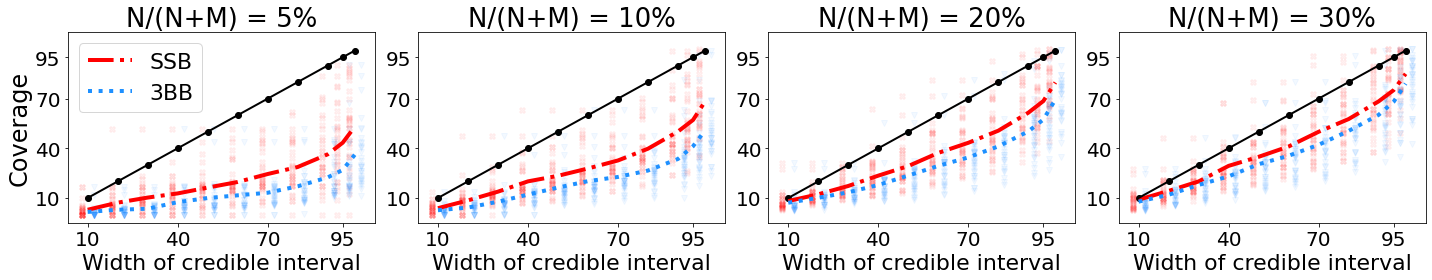

In [9]:
error_dictionary = np.load('results/_paper_calibration_error_dictionary.npy', allow_pickle = 1).item()
fracs = [.05, .1, .2, .3]
plt.figure(figsize = (20,4))
for f, fraction in enumerate(fracs):
    plt.subplot(1,len(fracs), f+1)

    GD_cov = error_dictionary['GD_coverage'][f]
    IBP_cov = error_dictionary['IBP_coverage'][f]
    plt.title(r'N/(N+M) = '+str(int(fraction*100))+'%', fontsize = 20)
    plt.scatter(error_dictionary['percentage_checks'],error_dictionary['percentage_checks'], color = 'k')

    for _ in range(GD_cov.shape[1]):
        plt.scatter(error_dictionary['percentage_checks']-.02, GD_cov[:,_], color = color_dictionary['SSB'], marker = 'X', alpha  =.05)
        plt.scatter(error_dictionary['percentage_checks']+.02, IBP_cov[:,_], color = color_dictionary['IBP'], marker = 'v', alpha  =.05)
    plt.plot(error_dictionary['percentage_checks'], GD_cov.mean(axis = -1), color = color_dictionary['SSB'], label = 'SSB', linestyle ='-.', linewidth=4)
    plt.plot(error_dictionary['percentage_checks'], IBP_cov.mean(axis = -1), color = color_dictionary['IBP'], label = '3BB', linestyle =':', linewidth=4)

    plt.plot(error_dictionary['percentage_checks'], error_dictionary['percentage_checks'], linewidth = 2, color = 'k')
    plt.yticks(error_dictionary['percentage_checks'][::3], np.array(100*error_dictionary['percentage_checks'][::3],dtype = int), fontsize = 20)
    plt.xticks(error_dictionary['percentage_checks'][::3], np.array(100*error_dictionary['percentage_checks'][::3],dtype = int), fontsize = 20)

    plt.title(r'N/(N+M) = '+str(int(fraction*100))+'%', fontsize = 26)
    plt.ylim([-.05,1.1])
    if f == 0:
        plt.ylabel('Coverage', fontsize = 24)
        plt.legend(fontsize = 22)
    plt.xlabel('Width of credible interval', fontsize = 22)
plt.tight_layout()
plt.savefig('Plots/coverage_all.pdf', dpi = 1000, bbox_inches = 'tight')
plt.savefig('Plots/coverage_all.eps', dpi = 1000, bbox_inches = 'tight')
plt.show()